# Imports

In [57]:
#import graphviz
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix
import seaborn as sns
from sklearn.dummy import DummyRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeRegressor
#from sklearn.tree import export_graphviz

# Importing the Dataset

In [37]:
raw_df = pd.read_csv('../raw_data/data_first_cleaning.csv')
df = raw_df.copy()
df

,address,garage-places,price,rooms,square-meters,neighborhood,city,latitude,longitude
0,"Avenida Raja Gabaglia, 1583",1,330000,1,40,Luxemburgo,Belo Horizonte,-19.936415,-43.953396
1,"Rua dos Expedicionários, 1082",5,1190000,4,411,Santa Amélia,Belo Horizonte,-20.225241,-44.397780
2,"Rua Marechal Hermes, 81",4,1590000,4,158,Gutierrez,Belo Horizonte,-19.937155,-43.958694
3,"Rua Juruna, 110",6,550000,3,278,Pindorama,Belo Horizonte,-19.912982,-44.019944
4,"Rua Maria Pereira de Araújo, 15",1,450000,3,87,Castelo,Belo Horizonte,-19.886147,-44.004236
...,...,...,...,...,...,...,...,...,...
5758,Rua Gama Cerqueira,2,560000,3,92,Nova Suíssa,Belo Horizonte,-19.945428,-43.970988
5759,"Rua Arthur Lourenço, 262",1,440000,3,90,Barreiro,Belo Horizonte,-19.979915,-44.026007
5760,Rua General Ephigênio Ruas Santos,2,500000,3,80,Itapoã,Belo Horizonte,-19.840904,-43.956037
5761,Rua General Ephigênio Ruas Santos,2,740000,3,80,Itapoã,Belo Horizonte,-19.840904,-43.956037


In [38]:
#Applying the same steps as before to get rid of the outliers
df = df[df['price'] < 35000000]
df = df[df['square-meters'] > 0]
df = df[df['square-meters'] < 16153] 
df = df[df['square-meters'] < 1500]
df.drop(columns=['address', 'city'], inplace=True)
df

,garage-places,price,rooms,square-meters,neighborhood,latitude,longitude
0,1,330000,1,40,Luxemburgo,-19.936415,-43.953396
1,5,1190000,4,411,Santa Amélia,-20.225241,-44.397780
2,4,1590000,4,158,Gutierrez,-19.937155,-43.958694
3,6,550000,3,278,Pindorama,-19.912982,-44.019944
4,1,450000,3,87,Castelo,-19.886147,-44.004236
...,...,...,...,...,...,...,...
5758,2,560000,3,92,Nova Suíssa,-19.945428,-43.970988
5759,1,440000,3,90,Barreiro,-19.979915,-44.026007
5760,2,500000,3,80,Itapoã,-19.840904,-43.956037
5761,2,740000,3,80,Itapoã,-19.840904,-43.956037


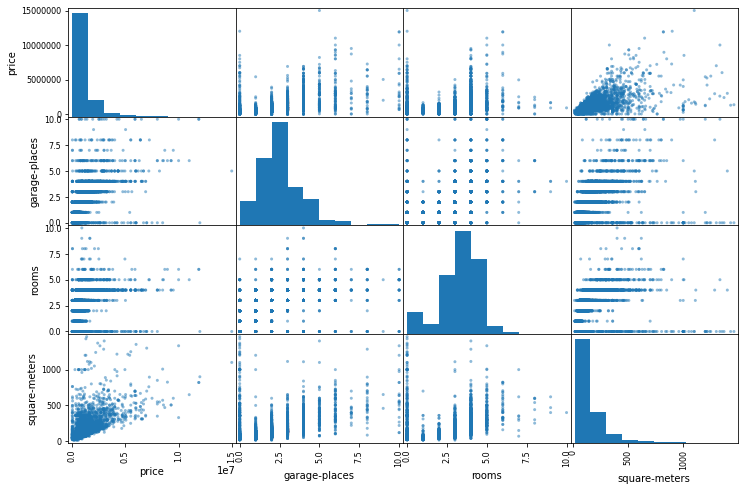

In [39]:
#Similar as the Seaborn PairPlot
attributes = ['price', 'garage-places', 'rooms', 'square-meters']
pd.plotting.scatter_matrix(df[attributes], figsize=(12, 8));

# One-Hot-Encode the Regions 

Splitting the neighborhoods by regions.

After checking that some names were not related in the city's database, I did it manually to check the missing regions on Google Maps. 

In [40]:
barreiro = ['Teixeira Dias Barreiro', 'Castanheira', 'Cardoso Barreiro', 'Brasil Industrial', 'Olaria', 
            'Flávio Marques Lisboa', 'Santa Helena', 'Araguaia', 'Solar do Barreiro', 'Milionários', 'Bonsucesso Barreiro', 
            'Tirol', 'Miramar', 'Bonsucesso', 'Petrópolis', 'Diamante', 'Barreiro']
centro_sul = ['Coração de Jesus', 'Comiteco', 'Mangabeiras', 'Cidade Jardim', 'Barro Preto', 'São Bento', 'Vila Paris', 
              'Carmo', 'Santa Lúcia', 'Cruzeiro', 'Anchieta', 'São Lucas', 'Funcionários', 'Santo Agostinho', 'Serra', 
              'Luxemburgo', 'Santo Antônio', 'Sion', 'Lourdes', 'Belvedere', 'Savassi', 'Centro', 'São Pedro']
leste = ['Horto Florestal', 'Jardim dos Pirineus', 'Esplanada', 'Pompéia', 'Vera Cruz', 'São Geraldo', 'Casa Branca', 
         'Saudade', 'Paraíso', 'Jonas Veiga', 'Nova Vista', 'Santa Inês', 'Floresta', 'Granja De Freitas', 'Horto', 
         'Colégio Batista', 'Sagrada Família', 'Santa Efigênia', 'Santa Tereza', 'Boa Vista']
nordeste = ['Maria Virgínia', 'Ipê', 'Nazaré', 'Nova Floresta', 'Lagoinha', 'Jardim Vitória', 'Pirajá', 'Silveira', 
            'Fernão Dias', 'Renascença', 'Ouro Minas', 'Concórdia', 'Palmares', 'Beija Flor', 'Graça', 'União', 
            'Cachoeirinha', 'Penha', 'Ipiranga', 'Santa Cruz', 'São Gabriel', 'Goiânia', 'Cidade Nova', 'Vitória']
noroeste = ['Conjunto Califórnia', 'Conjunto Celso Machado', 'Coqueiros', 'Santo André', 'Conjunto Jardim Filadélfia', 
            'Jardim Montanhês', 'São Salvador', 'Vila Oeste', 'Dom Bosco', 'Novo Glória', 'Caiçara Adeláide', 'Minas Brasil', 
            'Glória', 'São Cristóvão', 'Monsenhor Messias', 'Alto dos Caiçaras', 'Camargos', 'Aparecida', 'Alípio de Melo', 
            'Caiçaras', 'Alto dos Pinheiros', 'Álvaro Camargos', 'Carlos Prates', 'Santa Maria', 'Parque Pedro II', 
            'Padre Eustáquio', 'Bonfim', 'Serrano', 'Coração Eucarístico', 'Califórnia', 'Pindorama', 'João Pinheiro', ]
norte = ['Aeroporto', 'Minaslândia', 'Primeiro de Maio', 'Vila Clóris', 'Jaqueline', 'Minaslandia P Maio', 'Juliana', 
         'Etelvina Carneiro', 'Heliópolis', 'Canaã', 'Frei Leopoldo', 'Providência', 'Jardim Guanabara', 'Floramar', 
         'Planalto', 'São Tomaz']
oeste = ['Santa Sofia', 'Barroca', 'Vista Alegre', 'Estrela do Oriente', 'Salgado Filho', 'Betânia', 'Palmeiras', 
         'Jardim América', 'Calafate', 'Estrela Dalva', 'Havaí', 'Cinqüentenário', 'Estoril', 'Madre Gertrudes', 
         'Nova Granada', 'Marajó', 'Gameleira', 'Grajaú', 'Buritis', 'Gutierrez', 'Nova Gameleira', 'Nova Suíssa', 
         'Alto Barroca', 'Prado']
pampulha = ['Parque São José', 'Jardim Paqueta', 'Engenho Nogueira', 'São Francisco', 'Garças', 'Santa Rosa', 
            'Jardim Atlântico', 'Trevo', 'Céu Azul', 'Santa Terezinha', 'Manacás', 'Jaraguá', 'Paquetá', 'Dona Clara', 
            'São Luíz', 'Liberdade', 'Itatiaia', 'Urca', 'Bandeirantes', 'São José', 'Pampulha', 'Braúnas', 'Santa Amélia', 
            'Castelo', 'Ouro Preto', 'Itapoã', 'Santa Branca']
venda_nova = ['Novo Letícia', 'Parque Sao Pedro Venda Nova', 'Parque Copacabana', 'Minascaixa', 'Cenaculo', 
              'Visconde do Rio Branco', 'Sinimbu', 'Jardim Europa venda Nova', 'Piratininga Venda Nova', 'Parque Leblon', 
              'Europa', 'Rio Branco', 'Letícia', 'Jardim Leblon', 'Serra Verde', 'Copacabana', 'Venda Nova', 'Santa Mônica', 
              'Candelaria', 'Jardim dos Comerciários', 'Mantiqueira', 'São João Batista', 'Maria Helena']

In [41]:
regions = {
    'barreiro': ['Teixeira Dias Barreiro', 'Castanheira', 'Cardoso Barreiro', 'Brasil Industrial', 'Olaria', 
            'Flávio Marques Lisboa', 'Santa Helena', 'Araguaia', 'Solar do Barreiro', 'Milionários', 'Bonsucesso Barreiro', 
            'Tirol', 'Miramar', 'Bonsucesso', 'Petrópolis', 'Diamante', 'Barreiro'],
    'centro_sul': ['Coração de Jesus', 'Comiteco', 'Mangabeiras', 'Cidade Jardim', 'Barro Preto', 'São Bento', 'Vila Paris', 
              'Carmo', 'Santa Lúcia', 'Cruzeiro', 'Anchieta', 'São Lucas', 'Funcionários', 'Santo Agostinho', 'Serra', 
              'Luxemburgo', 'Santo Antônio', 'Sion', 'Lourdes', 'Belvedere', 'Savassi', 'Centro', 'São Pedro'],
    'leste': ['Horto Florestal', 'Jardim dos Pirineus', 'Esplanada', 'Pompéia', 'Vera Cruz', 'São Geraldo', 'Casa Branca', 
         'Saudade', 'Paraíso', 'Jonas Veiga', 'Nova Vista', 'Santa Inês', 'Floresta', 'Granja De Freitas', 'Horto', 
         'Colégio Batista', 'Sagrada Família', 'Santa Efigênia', 'Santa Tereza', 'Boa Vista'],
    'nordeste': ['Maria Virgínia', 'Ipê', 'Nazaré', 'Nova Floresta', 'Lagoinha', 'Jardim Vitória', 'Pirajá', 'Silveira', 
            'Fernão Dias', 'Renascença', 'Ouro Minas', 'Concórdia', 'Palmares', 'Beija Flor', 'Graça', 'União', 
            'Cachoeirinha', 'Penha', 'Ipiranga', 'Santa Cruz', 'São Gabriel', 'Goiânia', 'Cidade Nova', 'Vitória'],
    'noroeste': ['Conjunto Califórnia', 'Conjunto Celso Machado', 'Coqueiros', 'Santo André', 'Conjunto Jardim Filadélfia', 
            'Jardim Montanhês', 'São Salvador', 'Vila Oeste', 'Dom Bosco', 'Novo Glória', 'Caiçara Adeláide', 'Minas Brasil', 
            'Glória', 'São Cristóvão', 'Monsenhor Messias', 'Alto dos Caiçaras', 'Camargos', 'Aparecida', 'Alípio de Melo', 
            'Caiçaras', 'Alto dos Pinheiros', 'Álvaro Camargos', 'Carlos Prates', 'Santa Maria', 'Parque Pedro II', 
            'Padre Eustáquio', 'Bonfim', 'Serrano', 'Coração Eucarístico', 'Califórnia', 'Pindorama', 'João Pinheiro', ],
    'norte': ['Aeroporto', 'Minaslândia', 'Primeiro de Maio', 'Vila Clóris', 'Jaqueline', 'Minaslandia P Maio', 'Juliana', 
         'Etelvina Carneiro', 'Heliópolis', 'Canaã', 'Frei Leopoldo', 'Providência', 'Jardim Guanabara', 'Floramar', 
         'Planalto', 'São Tomaz'],
    'oeste': ['Santa Sofia', 'Barroca', 'Vista Alegre', 'Estrela do Oriente', 'Salgado Filho', 'Betânia', 'Palmeiras', 
         'Jardim América', 'Calafate', 'Estrela Dalva', 'Havaí', 'Cinqüentenário', 'Estoril', 'Madre Gertrudes', 
         'Nova Granada', 'Marajó', 'Gameleira', 'Grajaú', 'Buritis', 'Gutierrez', 'Nova Gameleira', 'Nova Suíssa', 
         'Alto Barroca', 'Prado'],
    'pampulha': ['Parque São José', 'Jardim Paqueta', 'Engenho Nogueira', 'São Francisco', 'Garças', 'Santa Rosa', 
            'Jardim Atlântico', 'Trevo', 'Céu Azul', 'Santa Terezinha', 'Manacás', 'Jaraguá', 'Paquetá', 'Dona Clara', 
            'São Luíz', 'Liberdade', 'Itatiaia', 'Urca', 'Bandeirantes', 'São José', 'Pampulha', 'Braúnas', 'Santa Amélia', 
            'Castelo', 'Ouro Preto', 'Itapoã', 'Santa Branca'],
    'venda_nova': ['Novo Letícia', 'Parque Sao Pedro Venda Nova', 'Parque Copacabana', 'Minascaixa', 'Cenaculo', 
              'Visconde do Rio Branco', 'Sinimbu', 'Jardim Europa venda Nova', 'Piratininga Venda Nova', 'Parque Leblon', 
              'Europa', 'Rio Branco', 'Letícia', 'Jardim Leblon', 'Serra Verde', 'Copacabana', 'Venda Nova', 'Santa Mônica', 
              'Candelaria', 'Jardim dos Comerciários', 'Mantiqueira', 'São João Batista', 'Maria Helena']   
}

In [42]:
#Changing each neighborhood by its region

for neighborhood in df['neighborhood'].unique():
    for region in regions.keys():
        if neighborhood in regions[region]:
            df['neighborhood'].replace(neighborhood, region, inplace=True)

In [43]:
ohe = OneHotEncoder(sparse=False)
ohe.fit(df[['neighborhood']])
encoded_values = ohe.transform(df[['neighborhood']])

df['barreiro'], df['centro_sul'], df['leste'], df['nordeste'], df['noroeste'], df['norte'], df['oeste'], df['pampulha'], df['venda_nova'] = encoded_values.T

#The latitude and longitude were here just for checking purposes
df.drop(columns=['neighborhood', 'latitude', 'longitude'], inplace=True)

# Defining the Train and Test set

## Defining X and Y

In [44]:
y = df['price']
X = df.drop(columns='price')

## Splitting the Sets

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Applying the MinMax Scaler

In [46]:
scaler = MinMaxScaler().fit(X_train)
X_train = scaler.transform(X_train)

In [47]:
X_test = scaler.transform(X_test)

# Structuring the Model

## Baseline Model/Dummy Model

In [48]:
baseline_model = DummyRegressor()
baseline_model.fit(X_train, y_train)
score = baseline_model.score(X_test, y_test)
score

-0.0003377209387049884

That's a **terrible** (but expected) result.

## Linear Regression

As usual, let's begin with a simple model!

In [68]:
model = LinearRegression()
cv_results = cross_validate(model, X_train, y_train, cv=5, scoring='r2')
cv_results['test_score'].mean() # >>>> 0.5777534051374665

0.5777534051374665

Just testing some ElasticNet to see if it's worthy...

In [69]:
en_model = ElasticNet(alpha=1, l1_ratio=0.999)
cv_results = cross_validate(en_model, X_train, y_train, cv=5, scoring='r2')
cv_results['test_score'].mean() # >>>> 0.5765902050481518

0.5765902050481518

When we consider the regions features, our score improves almost **10%**!

## Checking the Learning Curves

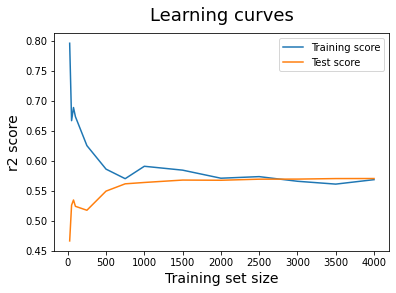

In [70]:
#Define our Train Sizes inside the function, or store it outside in a variable just like you did here;
train_sizes = [25,50,75,100,250,500,750,1000,1500,2000,2500,3000,3500,4000]

        #The function output consists in 5 arrays: train_sizes_abs, train_scores, test_scores, fit_times and score_times;
        #The function performs an Automatic Cross Validation (again, the 'cv' is the number of folds);
        #The 'estimator' must be an object that can perform both 'fit' and 'test' methods;
train_sizes, train_scores, test_scores = learning_curve(estimator=LinearRegression(), X=X, y=y, train_sizes=train_sizes, cv=5, scoring='r2')

        #Compute the mean of the Cross-Validated Train Scores and Test Scores;
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

        #And now plot the whole thing;
plt.plot(train_sizes, train_scores_mean, label = 'Training score')
plt.plot(train_sizes, test_scores_mean, label = 'Test score')
plt.ylabel('r2 score', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves', fontsize = 18, y = 1.03)
plt.legend()

At least the model doesn't seem to be under/over-fitting.

## Checking the Residuals

In [71]:
#Instantiating and trainning a model;
model = LinearRegression().fit(X_train, y_train)
#Predicting house prices with the model;
predictions = model.predict(X_test)
#Checking the difference between the predictions and the real prices
residuals = y_test - predictions

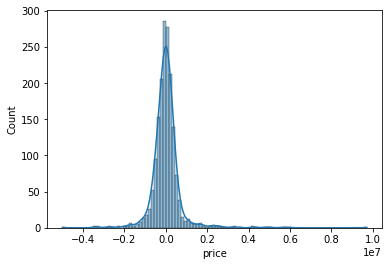

In [72]:
sns.histplot(residuals, bins=100, kde=True);

Even though the residuals are pretty centered around zero, the graph shows us we still have a significant amount of differences between the predicted values and the real values. Let's try to minimize it using different models.

## Decision Tree

Let's use a **Gridsearch** to check the best params for our tree.

In [24]:
tree = DecisionTreeRegressor()

grid = {'max_depth': [4, 5, 6], 
        'min_samples_split': [2, 3, 4],
        'min_samples_leaf': [10, 20, 30]}

search = GridSearchCV(tree, grid, 
                           scoring = 'r2',
                           cv = 5,
                           n_jobs=-1 # paralellize computation
                          )

search.fit(X_train, y_train)
print(search.best_score_, search.best_params_) # >>> 0.5930864386062871 {'max_depth': 6, 'min_samples_leaf': 20, 'min_samples_split': 2}

0.5930864386062871 {'max_depth': 6, 'min_samples_leaf': 20, 'min_samples_split': 2}


In [25]:
tree = DecisionTreeRegressor(max_depth=6, min_samples_split=2, min_samples_leaf=20)

cv_results = cross_validate(tree, X, y, scoring = "r2", cv=5)
cv_results['test_score'].mean() # >>> 0.5940893577202346

0.5940893577202346

Almost **12%** of increase! Going well!

Let's check the **Learning Curves** as well, to make sure our model is not under/over-fitting.

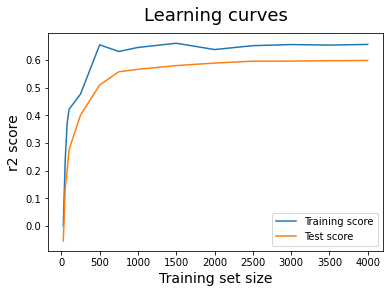

In [27]:
#Define our Train Sizes inside the function, or store it outside in a variable just like you did here;
train_sizes = [25,50,75,100,250,500,750,1000,1500,2000,2500,3000,3500,4000]

        #The function output consists in 5 arrays: train_sizes_abs, train_scores, test_scores, fit_times and score_times;
        #The function performs an Automatic Cross Validation (again, the 'cv' is the number of folds);
        #The 'estimator' must be an object that can perform both 'fit' and 'test' methods;
train_sizes, train_scores, test_scores = learning_curve(DecisionTreeRegressor(max_depth=6, 
                                                                              min_samples_split=2, 
                                                                              min_samples_leaf=20), X=X, y=y, train_sizes=train_sizes, cv=5, scoring='r2')

        #Compute the mean of the Cross-Validated Train Scores and Test Scores;
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

        #And now plot the whole thing;
plt.plot(train_sizes, train_scores_mean, label = 'Training score')
plt.plot(train_sizes, test_scores_mean, label = 'Test score')
plt.ylabel('r2 score', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves', fontsize = 18, y = 1.03)
plt.legend()

## Random Forest

Since the score still low, let's try modeling with a bunch of Trees.

In [30]:
forest = RandomForestRegressor()

grid = {'n_estimators': [80, 100, 120],
        'max_depth': [4, 5, 6], 
        'min_samples_split': [2, 3, 4],
        'min_samples_leaf': [10, 20, 30]}

search = GridSearchCV(forest, grid, 
                           scoring = 'r2',
                           cv = 5,
                           n_jobs=-1 # paralellize computation
                          )

search.fit(X_train, y_train)
print(search.best_score_, search.best_params_) # >>> 0.6204999984372837 {'max_depth': 6, 'min_samples_leaf': 10, 'min_samples_split': 3, 'n_estimators': 80}

0.6204999984372837 {'max_depth': 6, 'min_samples_leaf': 10, 'min_samples_split': 3, 'n_estimators': 80}


In [36]:
forest = RandomForestRegressor(n_estimators=80, max_depth=6, min_samples_split=3, min_samples_leaf=10)

cv_results = cross_validate(forest, X, y, scoring = "r2", cv=5)
cv_results['test_score'].mean() # >>>> 0.6370335514350662

0.6370922957401515

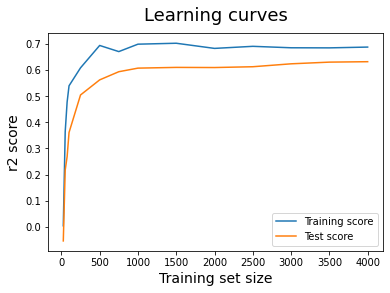

In [32]:
#Define our Train Sizes inside the function, or store it outside in a variable just like you did here;
train_sizes = [25,50,75,100,250,500,750,1000,1500,2000,2500,3000,3500,4000]

        #The function output consists in 5 arrays: train_sizes_abs, train_scores, test_scores, fit_times and score_times;
        #The function performs an Automatic Cross Validation (again, the 'cv' is the number of folds);
        #The 'estimator' must be an object that can perform both 'fit' and 'test' methods;
train_sizes, train_scores, test_scores = learning_curve(RandomForestRegressor(n_estimators=80, 
                                                                              max_depth=6, 
                                                                              min_samples_split=3, 
                                                                              min_samples_leaf=10), X=X, y=y, train_sizes=train_sizes, cv=5, scoring='r2')

        #Compute the mean of the Cross-Validated Train Scores and Test Scores;
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

        #And now plot the whole thing;
plt.plot(train_sizes, train_scores_mean, label = 'Training score')
plt.plot(train_sizes, test_scores_mean, label = 'Test score')
plt.ylabel('r2 score', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves', fontsize = 18, y = 1.03)
plt.legend()

Wow! Our R² is almost **0,64**! It improved by 0,15 compared to the model that didn't consider the regions! Which means: **THE REGIONS ARE PRETTY IMPORTANT!**

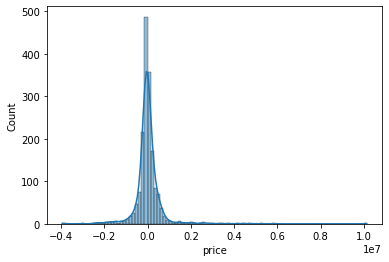

In [33]:
#Instantiating and trainning a model;
model = RandomForestRegressor(n_estimators=80, max_depth=6, min_samples_split=3, min_samples_leaf=10).fit(X_train, y_train)
#Predicting house prices with the model;
predictions = model.predict(X_test)
#Checking the difference between the predictions and the real prices
residuals = y_test - predictions
sns.histplot(residuals, bins=100, kde=True);

We can clearly see how the residuals are more centered around zero and less scattered! This model may be a good choice after all!